In [496]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy.linalg as npl
from scipy.optimize import minimize
import math as math
from itertools import combinations
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import WhiteKernel
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
import csv
from matplotlib.colors import LinearSegmentedColormap

In [567]:
### FIXME 
### 1 Error Bars on Contour Plots
### 2 Add noise properly to the GPR
### 3 Try to make the graphs match better

## Bringing in the data and plotting

In [499]:
columns = ["x","y","z","error"]
data = pd.read_table("Downsampled_SEOB_M75_Q2_2Ddata.txt",names = columns)
x = data['x'].values
y = data['y'].values
z = data['z'].values
#print(y.shape)
#print(x.shape)
#print(z.shape)
error = data['error'].values

## FIXME  need to mean revert y !!!

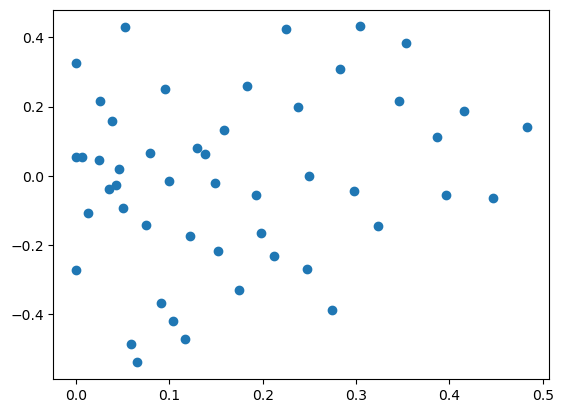

In [564]:
plt.scatter(x,y)

### Using tricontourf

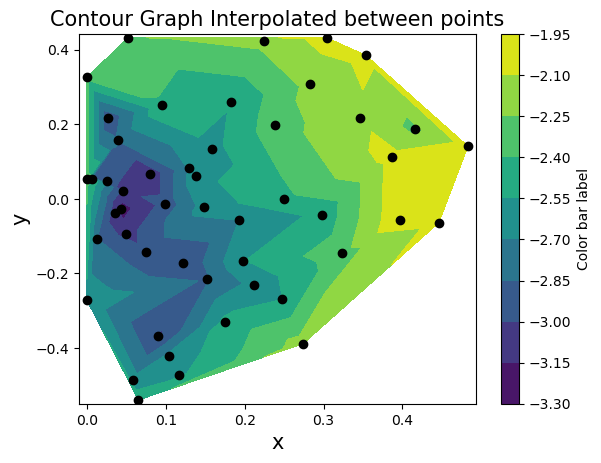

In [504]:
f, ax = plt.subplots()
contour = ax.tricontourf(x, y, z, levels=10, cmap="viridis")  
## FIXME research tricontourf and how it interpolates between points
ax.plot(x, y, 'ko')  


ax.set_xlim([x.min() - 0.01, x.max() + 0.01])
ax.set_ylim([y.min() - 0.01, y.max() + 0.01])

# Add color bar with extension for full color coverage
cbar = plt.colorbar(contour, ax=ax, extend='both')  # Extend adds color to extreme values
cbar.set_label("Color bar label")  # Label for color bar

plt.xlabel('x', size = 15)
plt.ylabel('y', size = 15)
plt.title('Contour Graph Interpolated between points', size = 15)
plt.show()

### Using tripcolor 

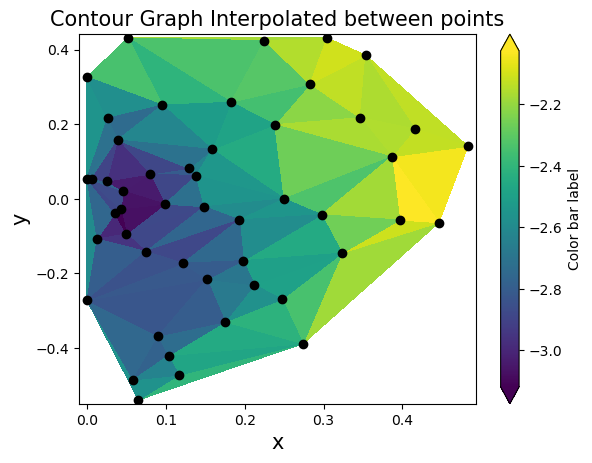

In [507]:
f, ax = plt.subplots()
contour = ax.tripcolor(x, y, z, alpha = 1 )  
## FIXME research tricontourf and how it interpolates between points
ax.plot(x, y, 'ko')  

ax.set_xlim([x.min() - 0.01, x.max() + 0.01])
ax.set_ylim([y.min() - 0.01, y.max() + 0.01])

# Add color bar with extension for full color coverage
cbar = plt.colorbar(contour, ax=ax, extend='both')  # Extend adds color to extreme values
cbar.set_label("Color bar label")  # Label for color bar
plt.xlabel('x', size = 15)
plt.ylabel('y', size = 15)
plt.title('Contour Graph Interpolated between points', size = 15)
plt.show()

## GPR on this 2d data

In [538]:
X = np.column_stack((x.reshape(-1), y.reshape(-1)))
Z = (z + error).reshape(-1,1)

In [540]:
guess_l = (2., 1.)  # In general, x and y have different scales
bounds_l = ((1e-20,100.),) * 2  # Same bounds for x and y
guess_n = 1.  # Amount of noise
bounds_n = (1e-20, 10.) # Bounds for noise
kernel = (  # Kernel objects can simply be summed using +
    RBF(length_scale=guess_l, length_scale_bounds=bounds_l)
    + WhiteKernel(noise_level=guess_n, noise_level_bounds=bounds_n)
)

In [552]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Z, train_size = 0.9)

In [554]:
gpr = GaussianProcessRegressor(kernel, normalize_y=True )
gpr.fit(X_train, Y_train)

GaussianProcessRegressor(kernel=RBF(length_scale=[2, 1]) + WhiteKernel(noise_level=1),
                         normalize_y=True)

In [556]:
print(gpr.kernel_)

RBF(length_scale=[0.313, 0.349]) + WhiteKernel(noise_level=0.721)


In [558]:
Zfit, Zstd = gpr.predict(X, return_std=True)
zstd = Zstd.reshape(x.shape)
zfit = Zfit.reshape(x.shape)

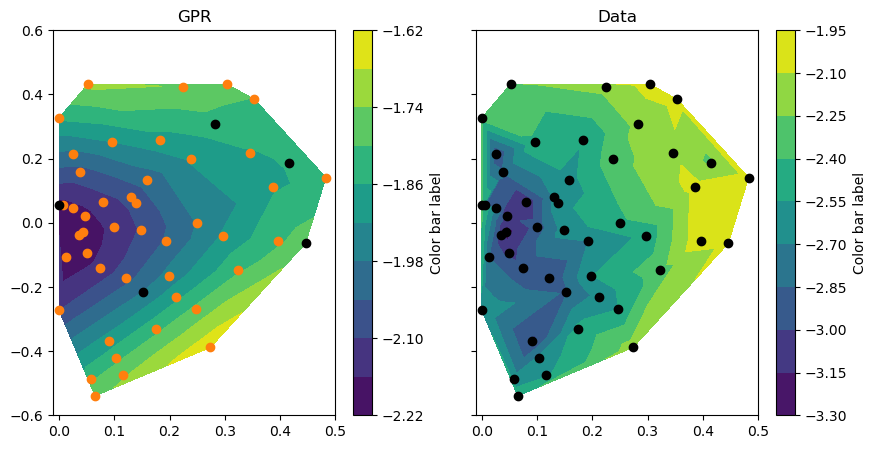

In [560]:

fig, ax = plt.subplots(1,2,sharex = True,sharey = True, figsize = (10,5))
ax[0].set_xlim((-0.01,0.5))
ax[0].set_ylim((-0.6,.6))
ax[0].set_title('GPR')

ax[0].plot(*X_train.T,'o',color="C1")  # Training samples
ax[0].plot(*X_test.T,'o',color = "black") # Testing
contour = ax[0].tricontourf(x, y,zfit,levels = 10, cmap="viridis")  # mean
cbar = plt.colorbar(contour, ax=ax[0], extend='both')  # Extend adds color to extreme values
cbar.set_label("Color bar label")  # Label for color bar

ax[1].set_xlim((-0.01,0.5))
ax[1].set_ylim((-0.6,.6))
ax[1].set_title('Data')
ax[1].plot(x, y, 'ko')  
contour1 = ax[1].tricontourf(x, y, z, levels=10, cmap="viridis")  
cbar = plt.colorbar(contour1, ax=ax[1], extend='both')  # Extend adds color to extreme values
cbar.set_label("Color bar label")  # Label for color bar

